# Set up

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast

from sklearn.metrics import r2_score

# Read Data

In [7]:
X_test = pd.read_csv('Data/X_test.csv', header=None)
Y_test = pd.read_csv('Data/Y_test_std.csv', header=None)
Y_test_21 = pd.read_csv('Data/Y_test_std_21.csv', header=None)

In [37]:
NNMGP_21_result = pd.read_csv('Result/L.NNMGP_21_result.csv')
MGP_21_result = pd.read_csv('Result/MGP_21_result.csv')
LocalGP_21_result = pd.read_csv('Result/LocalGP_21_result.csv')

# Compare

In [38]:
LocalGP_21_result['test_preds_list'] = LocalGP_21_result['test_preds'].apply(ast.literal_eval)

arr_2d = np.array(LocalGP_21_result['test_preds_list'].tolist())

In [39]:
r2_score(arr_2d, Y_test_21.values)

0.9813410528636828

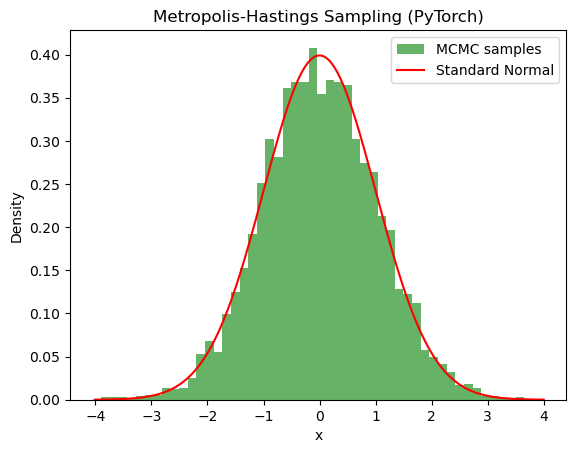

In [1]:
import torch
import matplotlib.pyplot as plt

# 定义目标分布的对数概率函数（标准正态分布，忽略归一化常数）
def target_log_prob(x):
    return -0.5 * x**2

# Metropolis-Hastings 算法实现
def metropolis_hastings(initial, num_samples, proposal_std):
    samples = []
    current = initial.clone()  # 避免直接修改输入
    current_log_prob = target_log_prob(current)
    
    for i in range(num_samples):
        # 从正态分布中采样生成提议点（随机游走）
        proposal = current + torch.randn_like(current) * proposal_std
        proposal_log_prob = target_log_prob(proposal)
        
        # 计算接受率： log(accept_ratio) = log(target(proposal)) - log(target(current))
        log_accept_ratio = proposal_log_prob - current_log_prob
        
        # 接受提议的条件（对数尺度比较）
        if torch.log(torch.rand(1)) < log_accept_ratio:
            current = proposal
            current_log_prob = proposal_log_prob
            
        samples.append(current.clone())
        
    return torch.stack(samples)

# 设置初始点和参数
initial = torch.tensor(0.0)
num_samples = 10000
proposal_std = 1.0

# 采样
samples = metropolis_hastings(initial, num_samples, proposal_std)

# 可视化采样结果
samples_np = samples.numpy()
plt.hist(samples_np, bins=50, density=True, alpha=0.6, color='g', label='MCMC samples')

# 绘制标准正态分布密度函数作为对比
import numpy as np
x = np.linspace(-4, 4, 1000)
y = 1/np.sqrt(2*np.pi) * np.exp(-0.5 * x**2)
plt.plot(x, y, 'r-', label='Standard Normal')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.title('Metropolis-Hastings Sampling (PyTorch)')
plt.show()
